
# Assignment No 2b
#### Assignment Credit 
###### *Dr. Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Gaussian **Naive** Bayes Classifier.


Naive Bayes Rule 
==============


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.


**Note : ** Accuracies may slightly vary due to randomness in train-text split.

In [443]:
%pylab inline
import scipy.stats as stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [444]:
print ("Matplotlib version : ", matplotlib.__version__)
print ("Pandas version : ", pd.__version__)
print ("Numpy version : ", np.__version__)
print ("Scipy version : ", scipy.__version__)
print ("Seaborn version : ", sns.__version__)

Matplotlib version :  3.7.1
Pandas version :  1.5.3
Numpy version :  1.24.3
Scipy version :  1.10.1
Seaborn version :  0.12.2


In [445]:
help(scipy.stats.norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [464]:
# YOUR CODE HERE

class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        ''' Initialize the class attributes. '''
        self.mean_vectors = None
        self.std_vectors = None
        self.prior_probs = None
        self.classes = None
    
    def gaussian_likelihood(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        coefficient = 1 / np.sqrt(2 * np.pi * std ** 2)
        lh = coefficient * exponent
        return lh
    
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        # Unique classes
        self.classes = np.unique(Y)
        
        # Calculating Prior Probabilities
        prior_probs = []
        for c in self.classes:
            prior_prob = np.round(np.count_nonzero(Y == c) / len(Y), 2)
            prior_probs.append(prior_prob)
            self.prior_probs = np.array(prior_probs)

        # Calculating Mean Vectors and Standard Deviation Vectors for each class
        mean_vectors = []
        std_vectors = []

        for c in self.classes:
            # Mean vector for each class
            mean = np.round(np.mean(X[Y == c], axis=0), 2)
            mean_vectors.append(mean)
            self.mean_vectors = np.array(mean_vectors)
            
            # Standard Deviation for each feature in the class
            std = np.round(np.std(X[Y == c], axis=0), 2)
            std_vectors.append(std)
            self.std_vectors = np.array(std_vectors)
        
        print(self.prior_probs) 
        print(self.mean_vectors)
        print(self.std_vectors)

    def test(self, X):
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probabilities: probability of each example falling in that predicted class
        '''

        n_examples, n_features = X.shape
        n_classes = len(self.classes)
        probabilities = np.zeros((n_examples, n_classes))
        
        for i in range(n_examples):
            for c in range(n_classes):
                prob = self.prior_probs[c]
                
                for j in range(n_features):
                    prob *= self.gaussian_likelihood(X[i][j], self.mean_vectors[c][j], self.std_vectors[c][j])
                probabilities[i][c] = prob

        predicted_classes = []
        for i in range(n_examples):
            class_probs = probabilities[i]
            max_prob = np.argmax(class_probs)
            predicted_class = self.classes[max_prob]
            predicted_classes.append(predicted_class)
        return predicted_classes, probabilities
    
    def predict(self, X):
        return self.test(X)[0]        

In [465]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Get your data in matrix

In [466]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)




#### Let's Plot the Data

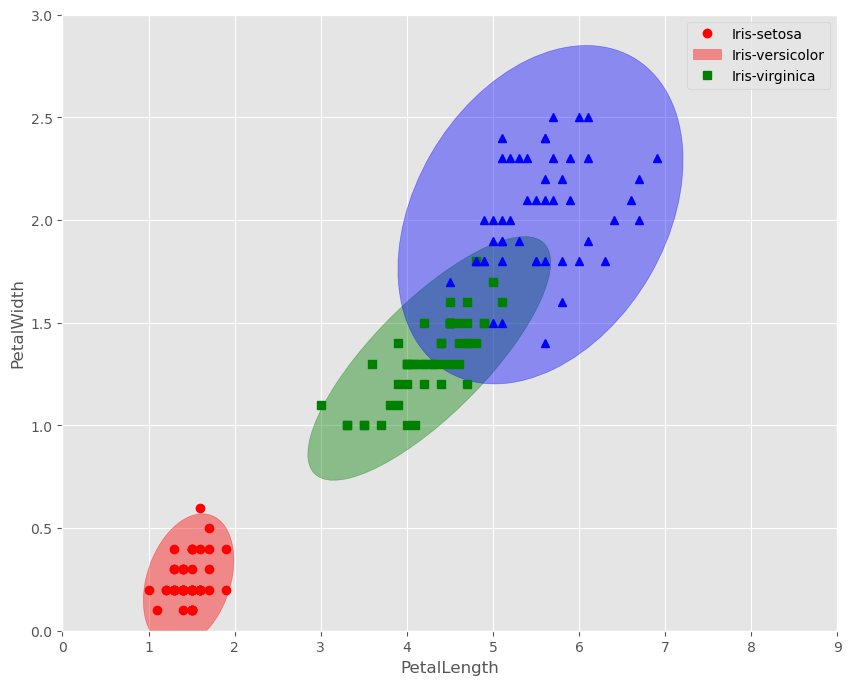

In [467]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [468]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


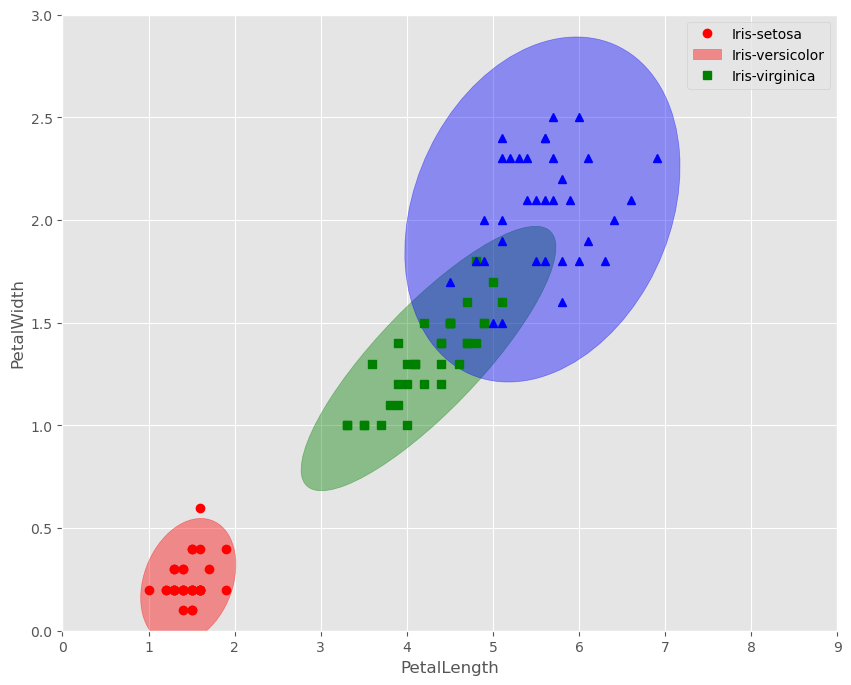

In [469]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

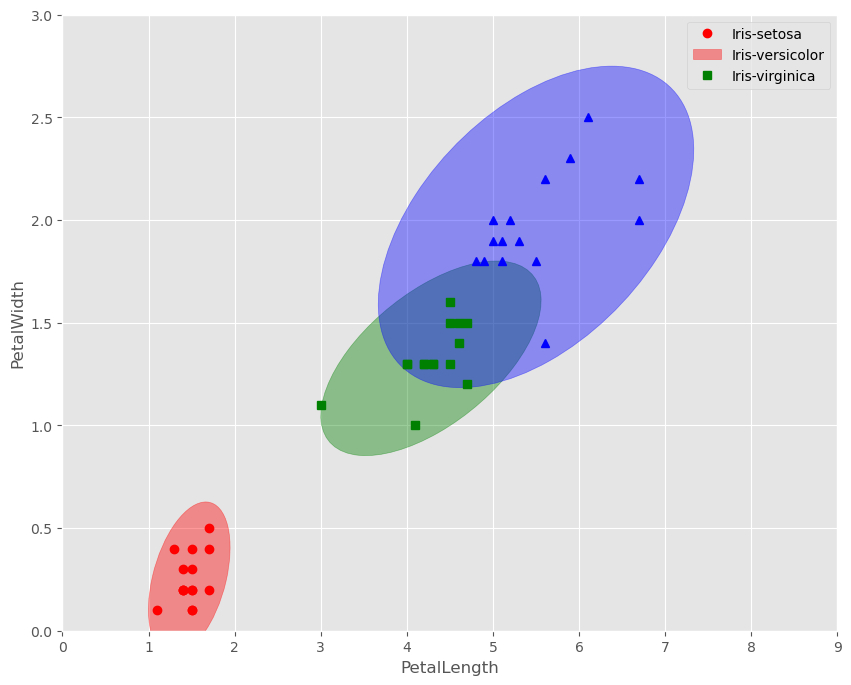

In [470]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [471]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

[0.33 0.34 0.34]
[[1.46 0.24]
 [4.25 1.33]
 [5.57 2.05]]
[[0.18 0.1 ]
 [0.49 0.21]
 [0.52 0.28]]


In [472]:
#Lets test it on the set of unseen examples...
pclasses,res=gb.test(Xtest[:,2:])

Lets see how good we are doing...
==================

In [473]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45


In [474]:
# Using Just two attributes, accuracy is 
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

45
Accuracy =  1.0


 Plotting the Decision Surface of Training Set... 


/home/muhammad/Desktop/Fall_24/ML_Theory/Assignments/A2/tools.py:691: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


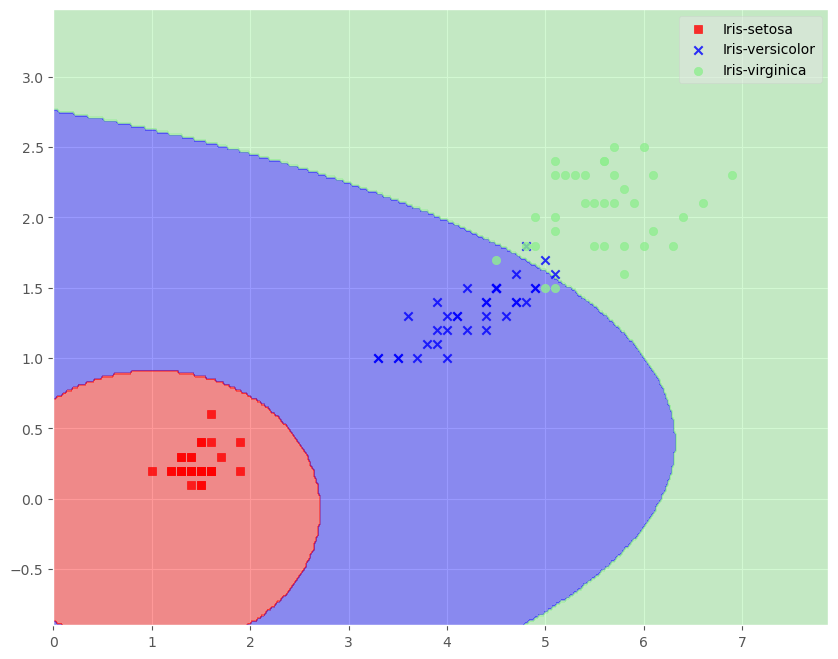

In [475]:
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

### Test Cases for your classifier

In [476]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

[0.33 0.34 0.34]
[[1.47 0.24]
 [4.26 1.33]
 [5.55 2.03]]
[[0.17 0.11]
 [0.47 0.2 ]
 [0.55 0.27]]
All cases passed !


## Question: What can you conclude from the above decision Region

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [477]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, 'Mean Accuracy =', np.mean(totacc))

Generating CV data for 3 classes
[0.33 0.34 0.34]
[[1.47 0.25]
 [4.32 1.35]
 [5.63 2.06]]
[[0.18 0.11]
 [0.42 0.19]
 [0.57 0.26]]
[Info] Fold 1 Accuracy = 0.9444444444444444
[0.33 0.34 0.34]
[[1.44 0.25]
 [4.21 1.31]
 [5.57 2.  ]]
[[0.17 0.11]
 [0.49 0.19]
 [0.52 0.27]]
[Info] Fold 2 Accuracy = 1.0
[0.33 0.34 0.34]
[[1.48 0.26]
 [4.29 1.34]
 [5.55 2.05]]
[[0.15 0.12]
 [0.47 0.21]
 [0.6  0.27]]
[Info] Fold 3 Accuracy = 0.9722222222222222
[0.33 0.34 0.34]
[[1.47 0.23]
 [4.22 1.31]
 [5.49 1.99]]
[[0.18 0.09]
 [0.47 0.2 ]
 [0.47 0.28]]
[Info] Fold 4 Accuracy = 0.9444444444444444
[0.9444444444444444, 1.0, 0.9722222222222222, 0.9444444444444444] Mean Accuracy = 0.9652777777777777



Hmm Quite Impressive...
--------------------------------

In [478]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

[0.33 0.34 0.34]
[[4.97 3.36 1.46 0.24]
 [5.94 2.75 4.25 1.33]
 [6.63 2.99 5.57 2.05]]
[[0.33 0.32 0.18 0.1 ]
 [0.55 0.33 0.49 0.21]
 [0.63 0.3  0.52 0.28]]


In [479]:
pclasses,res=gb.test(Xtest)

#### Do you expect your Test accuracy to increase or decrease ?

In [480]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.9777777777777777


### Test cases for all features

In [481]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

[0.33 0.34 0.34]
[[5.   3.42 1.47 0.24]
 [5.94 2.77 4.26 1.33]
 [6.59 2.97 5.55 2.03]]
[[0.35 0.38 0.17 0.11]
 [0.51 0.31 0.47 0.2 ]
 [0.63 0.32 0.55 0.27]]
All cases passed !


What can you conclude ?
====================

## Let's change the features... 

In [482]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

[0.33 0.34 0.34]
[[4.97 3.36]
 [5.94 2.75]
 [6.63 2.99]]
[[0.33 0.32]
 [0.55 0.33]
 [0.63 0.3 ]]
Accuracy =  0.7333333333333333


Remember Features are the important !!
======================

/home/muhammad/Desktop/Fall_24/ML_Theory/Assignments/A2/tools.py:691: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


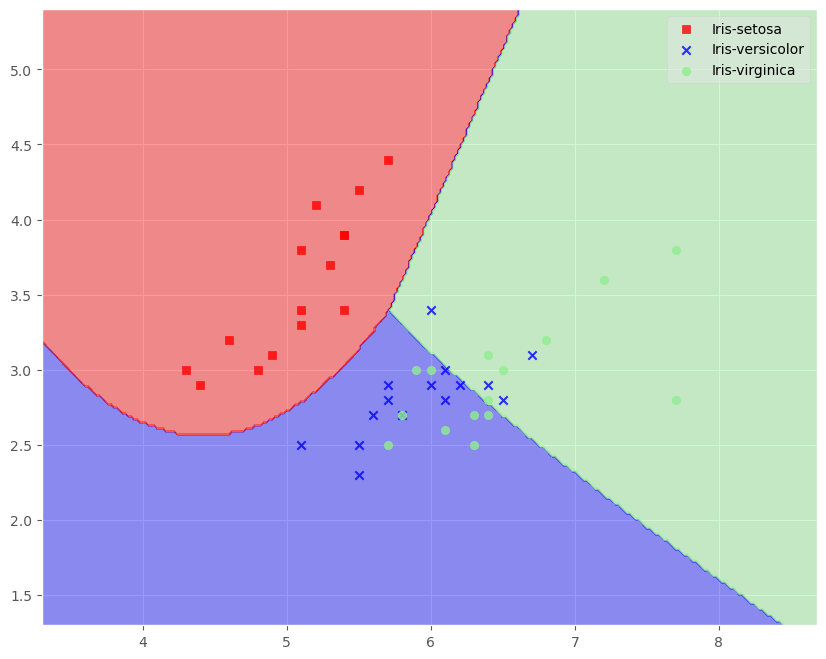

In [483]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

In [484]:
# Step 1: Generate Feature Pairs Manually
def generate_feature_pairs(n_features):
    ''' Manually generate all possible pairs of features '''
    pairs = []
    for i in range(n_features):
        for j in range(i + 1, n_features):
            pairs.append((i, j))
    return pairs

# Step 2: Manually Implement Cross-Validation
def cross_validate(X, Y, feature_pair, n_folds=5):
    ''' Perform cross-validation for the given feature pair '''
    n_samples = X.shape[0]
    fold_size = n_samples // n_folds
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Shuffle the data for random splitting
    
    accuracies = []
    
    for i in range(n_folds):
        # Split into train and test sets
        test_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.setdiff1d(indices, test_idx)
        
        X_train, Y_train = X[train_idx][:, feature_pair], Y[train_idx]
        X_test, Y_test = X[test_idx][:, feature_pair], Y[test_idx]
        
        # Step 3: Train the Gaussian Bayes model
        gb = GaussianBayes()
        gb.train(X_train, Y_train)
        
        # Test the model and calculate accuracy
        Y_pred = gb.predict(X_test)
        accuracy = np.mean(Y_pred == Y_test)
        accuracies.append(accuracy)
    
    # Return mean accuracy across folds
    return np.mean(accuracies)

# Step 4: Find the Best Pair of Features
def find_best_feature_pair(X, Y, n_folds=5):
    ''' Find the best feature pair based on cross-validation accuracy '''
    n_features = X.shape[1]
    feature_pairs = generate_feature_pairs(n_features)
    best_accuracy = 0
    best_pair = None
    
    for pair in feature_pairs:
        mean_accuracy = cross_validate(X, Y, pair, n_folds)
        print(f"Feature pair {pair} has mean accuracy: {mean_accuracy:.2f}")
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_pair = pair
    
    return best_pair, best_accuracy

In [485]:
best_pair, best_accuracy = find_best_feature_pair(X, Y, n_folds=5)
print(f"Best feature pair: {best_pair} with accuracy: {best_accuracy:.2f}")

[0.31 0.36 0.33]
[[5.   3.4 ]
 [5.92 2.76]
 [6.64 2.95]]
[[0.32 0.37]
 [0.52 0.32]
 [0.64 0.32]]
[0.32 0.34 0.33]
[[4.98 3.42]
 [6.   2.81]
 [6.61 2.99]]
[[0.37 0.41]
 [0.49 0.28]
 [0.67 0.31]]
[0.35 0.31 0.34]
[[5.01 3.41]
 [5.92 2.8 ]
 [6.65 2.98]]
[[0.35 0.38]
 [0.55 0.33]
 [0.56 0.3 ]]
[0.33 0.36 0.31]
[[5.01 3.42]
 [5.99 2.8 ]
 [6.5  2.98]]
[[0.37 0.4 ]
 [0.49 0.31]
 [0.61 0.33]]
[0.32 0.32 0.35]
[[5.01 3.43]
 [5.84 2.71]
 [6.53 2.97]]
[[0.33 0.34]
 [0.48 0.32]
 [0.64 0.33]]
Feature pair (0, 1) has mean accuracy: 0.78
[0.32 0.33 0.34]
[[5.   1.46]
 [5.91 4.22]
 [6.56 5.54]]
[[0.36 0.19]
 [0.5  0.45]
 [0.65 0.55]]
[0.31 0.31 0.38]
[[5.01 1.49]
 [5.91 4.28]
 [6.62 5.58]]
[[0.34 0.16]
 [0.48 0.45]
 [0.64 0.56]]
[0.34 0.34 0.32]
[[5.05 1.47]
 [5.93 4.28]
 [6.66 5.61]]
[[0.35 0.16]
 [0.52 0.48]
 [0.64 0.55]]
[0.34 0.33 0.32]
[[4.98 1.46]
 [6.02 4.3 ]
 [6.47 5.44]]
[[0.33 0.17]
 [0.51 0.46]
 [0.55 0.47]]
[0.33 0.36 0.31]
[[4.98 1.44]
 [5.92 4.23]
 [6.65 5.61]]
[[0.37 0.17]
 [0.53 0.47]


In [ ]:
# YOUR CODE HERE
        
## Hint, you can use python dictionary or default dict for counting the words
# or counter class from collections 

#TODO Complete this class for running the complete classifier... 

#You might need to define auxiliary classes for the complete algorithm..

class NaiveBayes:
    ''' Implements the Naive Bayes For Text Classification '''
    
    def __init__(self, classes):
        self.classes = classes
        self.prior = None
        self.class_tokens = {c: [] for c in self.classes}  # Store tokens by class
        self.vocab = set()
        self.words_in_class_0 = 0
        self.words_in_class_1 = 0
        self.likelihoods = None
        
    def addExample(self, x, y):
        '''
            Add example to corresponding class model.
            Input
            ---------
            x: example (list of words)
            y: label (class label)
        '''
        # Add tokens from example `x` to the class-specific list of tokens
        self.class_tokens[y].extend(x)
        self.vocab.update(x)  # Update the vocabulary with tokens from this example
    
    def train(self, X, Y):
        ''' Train the Naive Bayes model using the given data matrix X and labels Y.
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
        '''
        # Calculate prior probabilities for each class
        prior_probs = []
        likelihoods = []
        for c in self.classes:
            prior_prob = np.round(np.count_nonzero(Y == c) / Y.shape[0], 2)
            prior_probs.append(prior_prob)
        self.prior = np.array(prior_probs)
        
        # Making the tokens for each file
        Tokens = []
        for i in range(X.shape[0]):
            for text in X[i]:
                Tokens.append(parse_string(text))

        # Removing the Stpowords from the Tokens
#         Tokens = Remove_stopwords(Tokens)
        
        # Making Bag of Words for each file and saving in a dictionary to maintain class lable
        BagofWords = []
        for ind, token in enumerate(Tokens):
            dictionary_label = {
                'bow': create_bow_dict(token),
                'class': Y[ind]
            }
            BagofWords.append(dictionary_label)

        bow_class_0 = defaultdict(int)
        bow_class_1 = defaultdict(int)

        for entry in BagofWords:
            bow = entry['bow']
            label = entry['class']

            # Aggregate the counts of words based on class
            if label == 'neg':
                for word, count in bow.items():
                    bow_class_0[word] += count
            else:
                for word, count in bow.items():
                    bow_class_1[word] += count

        # Convert defaultdict back to regular dictionaries for final output
        bow_class_0 = dict(bow_class_0)
        bow_class_1 = dict(bow_class_1)
        
        # Calculating the Likelihood
        vocabulary = []
        for word in (list(bow_class_0.keys())):
            vocabulary.append(word)
        for word in (list(bow_class_1.keys())):
            vocabulary.append(word)
        
        self.words_in_class_0 = total_words_class_0 = int(sum(list(bow_class_0.values())))  # This should be an integer
        self.words_in_class_1 = total_words_class_1 = int(sum(list(bow_class_1.values())))  # This should be an integer

        self.vocab = vocab_size = len(vocabulary)

        # Initialize likelihood dictionaries
        likelihood_class_0 = {}
        likelihood_class_1 = {}

        # Calculate likelihood for each word in class neg with Laplace smoothing
        for word in vocabulary:
            word_count_class_0 = bow_class_0.get(word, 0)  # Default to 0 if not found
            likelihood_class_0[word] = (word_count_class_0 + 1) / (total_words_class_0 + vocab_size)
        # Calculate likelihood for each word in class pos with Laplace smoothing
        for word in vocabulary:
            word_count_class_1 = bow_class_1.get(word, 0)
            likelihood_class_1[word] = (word_count_class_1 + 1) / (total_words_class_1 + vocab_size)
        
        likelihoods.append(likelihood_class_0)
        likelihoods.append(likelihood_class_1)
        self.likelihoods = likelihoods
        
    def test(self, X):
        ''' 
            Test the trained classifiers on the given set of examples 
        
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        # YOUR CODE HERE
        pclasses = []
        # Making the tokens for each file
        Tokens = []
        for i in range(X.shape[0]):
            for text in X[i]:
                Tokens.append(parse_string(text))

        # Making Bag of Words for each file and saving in a dictionary to maintain class lable
        BagofWords = []
        for token in Tokens:
            BagofWords.append(create_bow_dict(token))
        
        posterior0 = []   
        posterior1 = []
        
        for i in range(2):
            if i == 0:
                print("Class 0 is started")
                for bow in BagofWords:
                    lh_0 = []
                    time.sleep(5)
                    print(len(BagofWords))
                    j = 0
                    for word in list(bow.keys()):
                        print(len(list(bow.keys())))
                        j += 1
                        print(j)
                        if word in list(self.likelihoods[0].keys()):
                            lh_0.append(self.likelihoods[0][word])
                        else:
                            lh_0.append(1 / self.words_in_class_0 + self.vocab)
                    product = 1
                    print("lik len 0", len(lh_0))
                    for number in lh_0:
                        product *= number
                    posterior0.append(product*self.prior[0])
            elif i == 1:
                print("Class 0 is started")
                for bow in BagofWords:
                    lh_1 = []
                    time.sleep(5)
                    print(len(BagofWords))
                    j = 0
                    for word in list(bow.keys()):
                        print(len(list(bow.keys())))
                        j += 1
                        print(j)
                        print("class_1")
                        if word in list(self.likelihoods[1].keys()):
                            lh_1.append(self.likelihoods[1][word])
                        else:
                            lh_1.append(1 / self.words_in_class_0 + self.vocab)
                    product = 1
                    print("lik len 1", len(lh_1))
                    for number in lh_1:
                        product *= number
                    posterior1.append(product*self.prior[1])
            
            for i in range(len(posterior0)):
                print("len poste ", len(posterior0), len(posterior1))
                print(i)
                pclasses.append(max(posterior0[i], posterior1[i]))
                
        return pclasses
    def predict(self, x):
        '''
            Predict the label of given input example...
            
            Input
            ---------
            x: example (list of words)
            
        '''
        
        # YOUR CODE HERE
        
        return 0